# Projeto de Bases de Dados - Parte 3

### Docente Responsável

Prof. Daniel Faria

### Turno L14 - Grupo 49
<dl>
    <dt>34 horas (33%)</dt>
    <dd>ist1103479 Afonso Matos</dd>
    <dt>34 horas (33%)</dt>
    <dd>ist1103860 Henrique Caroço</dd>
    <dt>34 horas (34%)</dt>
    <dd>ist1103883 Luís Calado</dd>
<dl>

In [ ]:
%load_ext sql
%sql postgresql://db:db@postgres/db

# Empresa de comércio online

## 0. Carregamento da Base de Dados

Carregue o esquema de Base de Dados apresentado no Anexo A.

In [ ]:
%%sql

DROP TABLE IF EXISTS customer CASCADE;
DROP TABLE IF EXISTS orders CASCADE;
DROP TABLE IF EXISTS pay CASCADE;
DROP TABLE IF EXISTS employee CASCADE;
DROP TABLE IF EXISTS process CASCADE;
DROP TABLE IF EXISTS department CASCADE;
DROP TABLE IF EXISTS workplace CASCADE;
DROP TABLE IF EXISTS works CASCADE;
DROP TABLE IF EXISTS office CASCADE;
DROP TABLE IF EXISTS warehouse CASCADE;
DROP TABLE IF EXISTS product CASCADE;
DROP TABLE IF EXISTS contains CASCADE;
DROP TABLE IF EXISTS supplier CASCADE;
DROP TABLE IF EXISTS delivery CASCADE;

CREATE TABLE customer(
cust_no INTEGER PRIMARY KEY,
name VARCHAR(80) NOT NULL,
email VARCHAR(254) UNIQUE NOT NULL,
phone VARCHAR(15),
address VARCHAR(255)
);

CREATE TABLE orders(
order_no INTEGER PRIMARY KEY,
cust_no INTEGER NOT NULL REFERENCES customer,
date DATE NOT NULL
--order_no must exist in contains
);

CREATE TABLE pay(
order_no INTEGER PRIMARY KEY REFERENCES orders,
cust_no INTEGER NOT NULL REFERENCES customer
);

CREATE TABLE employee(
ssn VARCHAR(20) PRIMARY KEY,
TIN VARCHAR(20) UNIQUE NOT NULL,
bdate DATE,
name VARCHAR NOT NULL
--age must be >=18
);

CREATE TABLE process(
ssn VARCHAR(20) REFERENCES employee,
order_no INTEGER REFERENCES orders,
PRIMARY KEY (ssn, order_no)
);

CREATE TABLE department(
name VARCHAR PRIMARY KEY
);

CREATE TABLE workplace(
address VARCHAR PRIMARY KEY,
lat NUMERIC(8, 6) NOT NULL,
long NUMERIC(9, 6) NOT NULL,
UNIQUE(lat, long)
--address must be in warehouse or office but not both
);

CREATE TABLE office(
address VARCHAR(255) PRIMARY KEY REFERENCES workplace
);

CREATE TABLE warehouse(
address VARCHAR(255) PRIMARY KEY REFERENCES workplace
);

CREATE TABLE works(
ssn VARCHAR(20) REFERENCES employee,
name VARCHAR(200) REFERENCES department,
address VARCHAR(255) REFERENCES workplace,
PRIMARY KEY (ssn, name, address)
);

CREATE TABLE product(
SKU VARCHAR(25) PRIMARY KEY,
name VARCHAR(200) NOT NULL,
description VARCHAR,
price NUMERIC(10, 2) NOT NULL,
ean NUMERIC(13) UNIQUE
);

CREATE TABLE contains(
order_no INTEGER REFERENCES orders,
SKU VARCHAR(25) REFERENCES product,
qty INTEGER,
PRIMARY KEY (order_no, SKU)
);

CREATE TABLE supplier(
TIN VARCHAR(20) PRIMARY KEY,
name VARCHAR(200),
address VARCHAR(255),
SKU VARCHAR(25) REFERENCES product,
date DATE
);

CREATE TABLE delivery(
address VARCHAR(255) REFERENCES warehouse,
TIN VARCHAR(20) REFERENCES supplier,
PRIMARY KEY (address, TIN)
);

Crie as instruções para o seu preenchimento de forma consistente, garantindo que todas as consultas SQL e OLAP, apresentadas mais adiante, produzam um resultado não vazio.

In [ ]:
%%sql
-- populate.sql

INSERT INTO customer VALUES (1,'Afonso', 'afonso@gmail.com', '9193510606', 'Rua das Flores 123 4000-001 Porto'),
    (3,'Henrique', 'henrique@gmail.com', '934567128', 'Avenida da Liberdade 456 3000-002 Coimbra'),
    (6,'Luís', 'luis@gmail.com', '976268091', 'Rua dos Moinhos 789 8000-003 Faro'),
    (4,'Tiago', 'tiago@gmail.com', '919191911', 'Travessa das Oliveiras 987 7300-004 Portalegre'),
    (5,'Artur', 'artur@gmail.com', '901234567', 'Praça do Comércio 654 1000-005 Lisboa'),
    (12,'Joel', 'joel@gmail.com', '930310101', 'Rua das Rosas 321 1600-006 Telheiras'),
    (11,'Joana', 'joana@gmail.com', '981212123', 'Avenida Central 654 1800-007 Olivais'),
    (10,'Anacleto', 'anacleto@gmail.com', '929737201', 'Rua dos Pinheiros 789 2350-008 Torres Novas'),
    (8, 'Mariana', 'mariana@gmail.com', '968335213', 'Rua da Fonte 987 7300-009 Portalegre');

INSERT INTO orders VALUES (1, 1, '2022-02-23'), (12, 1, '2023-01-01'),
    (2, 6, '2023-01-23'), (14, 12, '2023-03-01'), (25, 11, '2023-04-25'),
    (35, 10, '2023-01-11'),(3, 12, '2022-03-01'),(4, 12, '2022-04-20'),(5, 12, '2022-05-20'),
    (6, 3, '2022-05-27'), (7, 4, '2022-08-31'), (23, 8, '2022-05-13');


INSERT INTO pay VALUES (1,1), (2,6), (14, 12), (25, 11), (35, 10), (3, 12), (23, 8), (4, 12);


INSERT INTO employee VALUES ('123771324', '456900223', '2005-01-09', 'Samuel'),
    ('222577451', '303215303', '2004-12-12', 'João'),
    ('311584033', '219238932', '1990-04-14', 'Rodrigo'),
    ('123456789', '987654321', '1990-01-01', 'Miguel'),
    ('234567890', '876543210', '1992-05-15' , 'Jonas'),
    ('345678901', '765432109', '1988-11-30', 'Ana');

INSERT INTO process VALUES ('345678901', 1), ('222577451', 2),
    ('123771324', 14), ('234567890', 25), ('311584033', 35),('345678901',3), ('345678901',4),('345678901',23);

INSERT INTO department VALUES ('Marketing'), ('HR'), ('PR'),
    ('Sales'), ('DevTeam'), ('Finance');

INSERT INTO workplace VALUES ('Rua dos Lírios 1000-001 Lisboa', 45, 20),
    ('Rua das Rosas 1000-002 Lisboa', 42, 23), ('Rua das Flores 2740-122 Oeiras', 14, 64),
    ('Rua dos Girassóis 1600-001 Lisboa', 12.34689, 78.9012),
    ('Rua dos Cravos 1800-001 Lisboa', 34.567, 90.234),
    ('Rua das Violetas 2350-001 Torres Novas', 56.890, 12.356);

INSERT INTO office VALUES ('Rua das Flores 2740-122 Oeiras'),
    ('Rua dos Girassóis 1600-001 Lisboa'),
    ('Rua das Violetas 2350-001 Torres Novas');

INSERT INTO warehouse VALUES ('Rua das Rosas 1000-002 Lisboa'), ('Rua dos Lírios 1000-001 Lisboa'),
    ('Rua dos Cravos 1800-001 Lisboa');

INSERT INTO works VALUES ('123771324', 'Marketing','Rua das Flores 2740-122 Oeiras'),
    ('222577451',  'HR','Rua das Rosas 1000-002 Lisboa'),
    ('311584033',  'HR','Rua dos Lírios 1000-001 Lisboa'),
    ('311584033', 'PR','Rua das Rosas 1000-002 Lisboa'),
    ('123456789',  'Sales','Rua dos Girassóis 1600-001 Lisboa'),
    ('234567890',  'DevTeam','Rua dos Cravos 1800-001 Lisboa'),
    ('345678901',  'Finance','Rua das Violetas 2350-001 Torres Novas');

INSERT INTO product VALUES (123, 'Headphones JBL', '......', 100,1001),
    (22, 'Carregador Iphone', 'Carregamento rápido', 20,1002),
    (1, 'Rato wireless', 'Básico', 15,1003),
    (121, 'Pc', '15.6 polegadas,...', 1000,1004),
    (111, 'Cabo Usb', 'Cabo Usb 2 metros', 9.99,1005),
    (232, 'Carregador Wireless', 'Carregador Wireless novo', 19.99,1006),
    (3444, 'Teclado', 'Teclado Mecânico', 59.99,1007);

INSERT INTO contains VALUES (12, 22, 1), (1, 123, 60),
    (2, 121, 3), (14, 111, 2), (25, 232, 4), (35, 3444, 1), (5,22,1),
    (4,232,3), (3,3444,1), (6,123,3), (7,111,4), (23,3444,2);

INSERT INTO supplier VALUES (123123123, 'JBL', 'Rua da Liberdade 123 1000-001 Braga', 123,'01-01-2023'),
    (987654321, 'Basic Supplier', 'Rua das Flores 456 1000-002 Lisboa', 111,'02-02-2023'),
    (876543210, 'Supplier Plus', 'Rua dos Lírios 789 2740-122 Oeiras', 232,'03-03-2023'),
    (765432109, 'Supplier Premium', 'Rua da Boavista 987 3444-555 Porto', 3444,'04-04-2023');

INSERT INTO delivery VALUES ('Rua das Rosas 1000-002 Lisboa', 123123123),
    ('Rua dos Lírios 1000-001 Lisboa', 123123123),
    ('Rua dos Cravos 1800-001 Lisboa', 876543210);

## 1. Restrições de Integridade

Apresente o código para implementar as seguintes restrições de integridade, se necessário, com recurso a extensões procedimentais SQL (Stored Procedures e Triggers):

(RI-1) Nenhum empregado pode ter menos de 18 anos de idade

In [ ]:
%%sql
-- (RI-1)
ALTER TABLE employee ADD CONSTRAINT check_age CHECK (date_part('year', age(bdate)) >= 18);

(RI-2) Um 'Workplace' é obrigatoriamente um 'Office' ou 'Warehouse' mas não pode ser ambos

In [ ]:
%%sql
-- (RI-2)
CREATE OR REPLACE FUNCTION warehouse_check() RETURNS TRIGGER AS
$$
BEGIN
    IF NEW.address in (SELECT wo.address
        FROM Workplace wo
        WHERE (wo.address IN (SELECT address FROM Office))) THEN
            raise exception 'Address cannot be in Warehouse because is already in Office.';
    END IF;
        RETURN NEW;
END
$$ LANGUAGE plpgsql;

CREATE OR REPLACE FUNCTION office_check() RETURNS TRIGGER AS
$$
BEGIN
    IF NEW.address in (SELECT wo.address
        FROM Workplace wo
        WHERE (wo.address IN (SELECT address FROM Warehouse))) THEN
            raise exception 'Address cannot be in Office because is already in Warehouse.';
    END IF;
        RETURN NEW;
END
$$ LANGUAGE plpgsql;

DROP TRIGGER IF EXISTS check_workplace_address_office ON Office;
DROP TRIGGER IF EXISTS check_workplace_address_warehouse ON warehouse;

CREATE CONSTRAINT TRIGGER check_workplace_address_office
AFTER INSERT OR UPDATE ON Office
DEFERRABLE INITIALLY DEFERRED
FOR EACH ROW
EXECUTE FUNCTION office_check();

CREATE CONSTRAINT TRIGGER check_workplace_address_warehouse
AFTER INSERT OR UPDATE ON Warehouse
DEFERRABLE INITIALLY DEFERRED
FOR EACH ROW
EXECUTE FUNCTION warehouse_check();

(RI-3) Uma 'Order' tem de figurar obrigatoriamente em 'Contains'.

In [ ]:
%%sql
-- (RI-3)
CREATE OR REPLACE FUNCTION check_if_order_in_contains()
RETURNS TRIGGER AS $$
BEGIN
  IF NOT EXISTS (
    SELECT order_no FROM contains WHERE order_no = NEW.order_no
  ) THEN
    RAISE EXCEPTION 'Order must be in the "Contains" table.';
  END IF;
  RETURN NEW;
END;
$$ LANGUAGE plpgsql;

DROP TRIGGER IF EXISTS validate_order_in_contains_trigger ON orders;

CREATE CONSTRAINT TRIGGER validate_order_in_contains_trigger
AFTER INSERT OR UPDATE ON orders
DEFERRABLE INITIALLY DEFERRED
FOR EACH ROW
EXECUTE FUNCTION check_if_order_in_contains();

## 2. Consultas SQL

Apresente a consulta SQL mais sucinta para cada uma das seguintes questões

1) Qual o número e nome do(s) cliente(s) com maior valor total de encomendas pagas?

In [ ]:
%%sql
-- SELECT ...
SELECT c.cust_no, c.name, SUM(qty * price) as total
FROM customer c
  JOIN pay USING (cust_no)
  JOIN contains USING (order_no)
  JOIN product USING (sku)
GROUP BY cust_no
HAVING SUM(qty * price) >= ALL(
  SELECT SUM(qty * price)
  FROM customer
    JOIN pay USING (cust_no)
    JOIN contains USING (order_no)
    JOIN product USING (sku)
  GROUP BY cust_no
);


2. Qual o nome dos empregados que processaram encomendas em todos os dias de 2022 em que houve encomendas?

In [ ]:
%%sql
-- nome dos empregados->quociente
--que processaram encomendas --> dividendo
--em todos os dias de 2022 em que houve encomendas -->divisor
SELECT e.name --quociente
FROM employee e
WHERE NOT EXISTS (
    SELECT date --divisor
        FROM process JOIN orders USING(order_no) WHERE EXTRACT(YEAR FROM date) = 2022
    EXCEPT
    SELECT date --dividendo
    FROM employee
        JOIN process USING (ssn)
        JOIN orders USING (order_no)
        WHERE ssn = e.ssn );


3. Quantas encomendas foram realizadas mas não pagas em cada mês de 2022?

In [ ]:
%%sql
WITH months AS (
  SELECT generate_series(1, 12) AS month)

SELECT COUNT(order_no) AS unpaid_orders, month
FROM months
    LEFT JOIN orders ON month = EXTRACT(MONTH FROM date)
    AND EXTRACT(YEAR FROM date) = 2022
    AND order_no NOT IN (SELECT order_no FROM pay)
GROUP BY month
ORDER BY month;


## 3. Vistas

Crie uma vista que resuma as informações mais importantes sobre as vendas de produtos, combinando informações de diferentes tabelas do esquema de base de dados. A vista deve ter o seguinte esquema:

product_sales(sku, order_no, qty, total_price, year, month, day_of_month, day_of_week, city)

In [ ]:
%%sql
DROP VIEW IF EXISTS product_sales;

CREATE VIEW product_sales AS
SELECT contains.sku, contains.order_no, qty, (qty * price) AS total_price, year, month, day_of_month, day_of_week , city
FROM customer
    JOIN orders USING (cust_no)
    JOIN pay USING(order_no)
    JOIN contains USING (order_no)
    JOIN product USING (sku),
    CAST(EXTRACT(YEAR FROM date) AS INT) AS year,
    CAST(EXTRACT(MONTH FROM date) AS INT) AS month,
    CAST(EXTRACT(DAY FROM date) AS INT) AS day_of_month,
    CAST(EXTRACT(DOW FROM date) AS INT) AS day_of_week,
    SUBSTRING(address FROM '[0-9][0-9][0-9][0-9]-[0-9][0-9][0-9] (.+)') AS city;

## 4. Desenvolvimento de Aplicação

### Explicação da arquitetura da aplicação web, incluindo um link para uma versão de trabalho e as relações entre os vários ficheiros na pasta web/arquivos

...

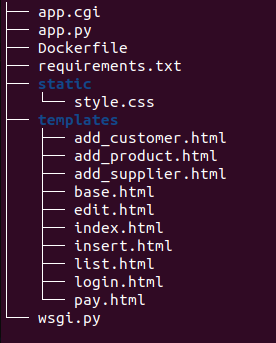

A aplicação web desenvolvida no contexto do projeto.
Sendo constituído por arquivos Python e HTML (imagem acima), o eixo principal do nosso projeto é o ficheiro app/app.py, que é a responsável por fazer o routing entre as diferentes páginas da app.<br>
Ao abri-se o link somos redirecionados para uma página de Login (login.html). Esta página não apresenta nenhuma utilidade na Base de Dados, sendo a sua única função apresentar uma experiência mais realista e emergente.
Tendo preenchido os campos, após clicar no botão de Login , somos redirecionados para a página Home, criada pelo index.html, onde temos uma lista de opções para todas as funcionalidades que o site fornece.<br>
Ao clicar numa destas opções e no botão de Confirmar, somos redirecionados para uma de quatro tipos de listas , definidas em list.html, lista de produtos, lista de fornecedores, lista de clientes e lista de encomendas não pagas ou um form para inserir o nº de cliente (caso seja para efetuar ou simular o pagamento de uma encomenda) definido no ficheiro insert.html.
Em algumas destas listas a interface muda ligeiramente de acordo com a ação que se pretendo fazer , por exemplo, Editar Produto e Adicionar/Remover Produtos leva para a mesma lista porém
no Editar temos um botão que redireciona para a função edit_product enquanto que na outra opção temos um botão de adicionar um produto (redireciona para add_product da app.py) e de remover produtos (redireciona para product_remove da app.py).
As funções de Adicionar e Remover Cliente são apresentadas na list.html com type="customer" ; Adicionar e Remover Produto com type="product" e purpose="insert_remove"; Editar Produto com type="product" e purpose="edit" ; Fazer Encomenda com type="product" e purpose="make_order" ; Simular Pagamento com type="order". As variáveis **type** e **purpose**, foram criadas com o propósito de serem usadas no ficheiro list.html usando Jinja, de modo a não duplicar ficheiros para as várias listagens.
##**Registo e remoção de Clientes**
 - No Adicionar Cliente (template/add_customer.html chamada pela função add_customer()) basta adquirir todos os atributos do Cliente e inseri-lo na Base de Dados, verificando, caso não sejam nulos, se a morada tem o formato pedido no enunciado e se o número de telemóvel tem 9 dígitos.
 - No Remover Cliente(na app.py, remove_customer()), por uma questão de simplicidade, optámos por colocar os atributos que podem ser NULL, a NULL e aqueles que não o podem ser, custo_no, name, email, atualizamos-os para uma versão "masked", que depois ao lermos conseguimos, em operações futuras, identificar e optar por não os utilizar nas nossas listas.

##**Registo e remoção de Produtos e Fornecedores**
 - No Remover Fornecedores(na app.py, supplier_remove()) a nossa abordagem foi de apagar as Delivery que estavam relacionadas a esse Fornecedor e só depois é que apagamos o Fornecedor.
 - No Adicionar Fornecedores(template/add_supplier.html chamada pela função add_supplier) a nossa abordagem foi de adicionar um Fornecedor tendo em atenção caso os atributos opicionais (que são todos exceto o TIN do supplier) sejam null. Para estas situações esses atributos são inseridos como "None".
 - No Remover Produtos(na app.py, product_remove()) a nossa abordagem foi de atualizar o SKU dos fornecedores associados ao produto a apagar por NULL, apagar todos os Contains do produto e por fim apagar o produto.
 - No Adicionar Produtos(template/add_product.html chamada pela função add_product) verificamos se a descrição e o EAN são vazios, uma vez que são dados opcionais e colocamos na Base de Dados os dados obrigatórios e os dados opcionais, que caso sejam vazios têm o valor "None"

##**Editar Produtos**
- No Editar Produto é nos apresentada a lista de produtos em que cada produto tem um botão de editar. Ao clicar somos direcionados para o template/edit.html, chamada pela função edit_product. Nesta página podemos mudar o preço e a descrição do produto selecionado e, ao clicarmos guardar voltamos para a página da lista dos produtos, já com a alteração feita.

##**Realização de Encomendas e Simulação do pagamento de Encomendas**
 - Em relação às duas últimas operações, quando queremos realizar uma encomenda, é primeiramente, pedido o número do cliente que a vai realizar (templates/insert.html).
 - De seguida somos redirecionados para a lista de produtos(list.html) onde cada produto tem um "form" para colocar a quantidade que deseja encomendar.
Por fim, temos um botão de Confirmar encomenda que nos devolve à página Home (index.html)
 - Por último, para simular o pagamento de uma encomenda. Tem um início semelhante à realização de uma encomenda, ou seja, leva-nos para templates/insert.html, porém ao clicarmos em confirmar, esta funcionalidade leva-nos à lista de "unpaid_orders" (list.html), que apresenta todas as encomendas que ainda não foram pagas por esse cliente, a partir de aí o cliente apenas tem de clicar no botão de pagar, para simular o pagamento de uma encomenda.
Para a simulação de uma encomenda é introduzido a order_no e o cust_no da order na tabela pay. Após clicar, somos redirecionados para o pay.html que nos mostra a confirmação que a order selecionada foi paga.

É de extrema importância referir que a app tem um header que está sempre presente em todas as páginas. Este header possui botões para todas as funcionalidades implementadas e é acessível a partir de qualquer página. Até é possível voltar à página home (index.html), se clicarmos no nome da app, Bases de Dados.



## 5. Consultas OLAP

Usando a vista desenvolvida para a Questão 3, escreva duas consultas SQL que permitam analisar:

In [ ]:
%%sql
--Tabela de Dimensão Data
DROP TABLE IF EXISTS data;

CREATE TABLE data(
year INTEGER,
month INTEGER,
weekday INTEGER,
day INTEGER);
--Inserção
INSERT INTO data (year, month, weekday, day)
    SELECT EXTRACT(YEAR FROM dd), EXTRACT(MONTH FROM dd),
        EXTRACT(DOW FROM dd), EXTRACT(DAY FROM dd)
        FROM GENERATE_SERIES(
        ('2022-01-01'::TIMESTAMP),
        ('2022-12-31'::TIMESTAMP),
        '1 day'::INTERVAL) dd;

1. As quantidade e valores totais de venda de cada produto em 2022, globalmente, por cidade, por mês, dia do mês e dia da semana

In [ ]:
%%sql
SELECT sku, p.city, d.month, d.day AS day_of_month, d.weekday AS day_of_week, COALESCE(SUM(p.qty), 0) AS total_qty, COALESCE(SUM(p.total_price), 0) AS total_product_price
FROM product_sales  p RIGHT JOIN data d ON p.year = d.year
    AND p.month = d.month AND p.day_of_month = d.day AND p.day_of_week = d.weekday
GROUP BY GROUPING SETS((sku, city), (sku, d.month), (sku, d.day), (sku, d.weekday), sku)
ORDER BY p.city, d.month, day_of_month, day_of_week;

2. O valor médio diário das vendas de todos os produtos em 2022, globalmente, por mês e dia da semana

In [ ]:
%%sql
WITH temp AS
    (SELECT d.month, d.weekday AS day_of_week, SUM(total_price) AS daily_sum
        FROM product_sales p RIGHT JOIN data d ON p.year = d.year
        AND p.month = d.month AND p.day_of_month = d.day AND p.day_of_week = d.weekday
        GROUP BY d.month, d.weekday)
SELECT  month, day_of_week, COALESCE(AVG(daily_sum),0) AS daily_avg FROM temp
    GROUP BY ROLLUP(day_of_week, month)
    ORDER BY month, day_of_week;

## 6. Índices

Indique, com a devida justificação, que tipo de índice(s), sobre qual(is) atributo(s) e sobre qual(is) tabela(s) faria sentido criar, de forma a agilizar a execução de cada uma das seguintes consultas:

### 6.1
SELECT order_no
<br>FROM orders
<br>JOIN contains USING (order_no)
<br>JOIN product USING (SKU)
<br>WHERE price > 50 AND
<br>EXTRACT(YEAR FROM date) = 2023

In [ ]:
%%sql
DROP INDEX IF EXISTS idx_orders_date;
CREATE INDEX idx_orders_date ON orders USING BTREE(date);
DROP INDEX IF EXISTS idx_product_price;
CREATE INDEX idx_product_price ON product USING BTREE(price);

### Tipo de Índice, Atributos & Justificação
Para a esta query, optou-se por criar índices no atributo **date** da relação **orders**, e outro no atributo **price** da relação **product**:
 - No atributo **date** optou-se por um índice **Btree**, pois apesar de a comparação feita a partir da data parecer uma igualdade, acaba por funcionar como uma operação de range pelo facto de se fazer EXTRACT(YEAR FROM date) = 2023 (que é o equivalente a date > 2022-12-31 ^ date < 2024-01-01)
 - No atrbuto **price** optou-se por um indíce **Btree** pois trata-se de uma comparação de range, sendo os indíces Btree muito mais eficientes para este caso.
 - Para as claúsulas **JOIN** optou-se por não se adiconar nenhum indíce, visto que as operações de JOIN são feitas usando chaves primárias, que são por default indíces Btree.

### 6.2
SELECT order_no, SUM(qty*price)
<br>FROM contains
<br>JOIN product USING (SKU)
<br>WHERE name LIKE ‘A%’
<br>GROUP BY order_no;

In [ ]:
%%sql
DROP INDEX IF EXISTS idx_product_name;
CREATE INDEX idx_product_name ON product USING BTREE(name);

### Tipo de Índice, Atributos & Justificação

Para esta query, optou-se por criar um indíce para a relação **product**, no seu atrbuto **name**:
 - Optou-se pela indexação de **name**, em **product**, via **BTree**, pois a comparação pretendida irá englobar todo um intervalo de nomes que comecem por A, pelo que aqui um Hash não será tão eficaz, porque não se pretende uma comparação de igualdade especifíca.
 - Para a cláusula **GROUP BY**, não se considerou necessário a criação de um indíce, visto que o atributo **order_no** da relação **contains**, faz parte de um indíce composto BTree (pela chave primária da relação contains ser (order_no, SKU)).
 - Para a cláusula **JOIN** também não se optou pela criação de um índice, pela mesma razão do ponto **6.1**